# Optimizing Crop Rotation for Small-scale farmers in Rwanda

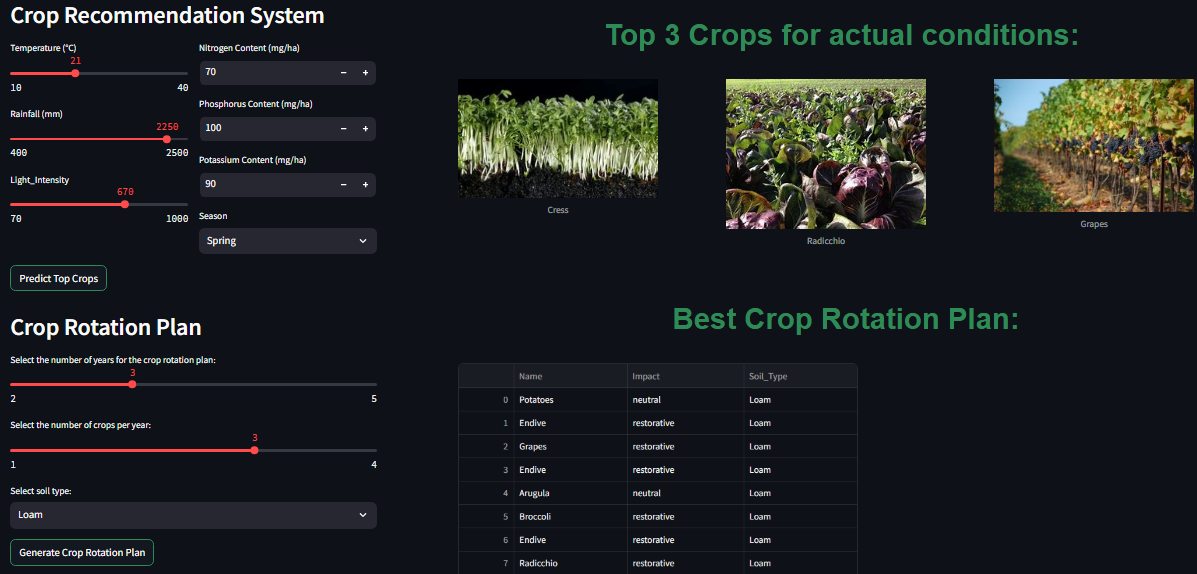

# Crop recommendation part

In [1]:
# libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimpy import skim

In [2]:
# dataset
file_path = 'soil.impact.csv'
df = pd.read_csv(file_path)

#summary of the dataset using skimpy
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15400  │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 15     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Temperature        │   0 │     0 │   20.8 │   4.415 │   9.356 │  17.92 │  19.93 │  22.94 │  39.91 │   ▇▇▂  │  │
│ │ Rainfall           │   0 │     0 │  948.8 │   340.9 │   409.9 │  707.8 │  846.6 │   1109 │   2508 │ ▇▇▃▁▁  │  │
│ │ pH                 │   0 │     0 │  6.473 │  0.4491 │   4.889 │  6.246 │  6.466 │  6.697 │  8.023 │  ▂▇▇▂  │  │
│ │ Light_Hours        │   0 │     0 │  9.459 │   2.588 │   5.045 │  7.017 │  8.986 │  12.02 │  15.92 │ ▆▇▆▅▇▁ │  │
│ │ Light_Intensity    │   0 │     0 │    398 │   190.5 │   69.15 │  265.4 │  385.3 │  508.2 │  985.2 │ ▅▇▇▅ ▁ │  │
│ │ Rh                 │   0 │     0 │  67.12 │   19.01 │   29.88 │  53.01 │  63.25 │     90 │  99.93 │ ▁▆▇▅▁▇ │  │
│ │ Nitrogen           │   0 │     0 │  142.8 │   58.52 │   41.73 │  117.6 │  140.5 │  160.2 │  409.6 │  ▃▇▂   │  │
│ │ Phosphorus         │   0 │     0 │  107.7 │   72.78 │   13.16 │  57.63 │  87.73 │  145.3 │    360 │ ▇▇▅  ▁ │  │
│ │ Potassium          │   0 │     0 │  180.5 │     104 │   34.98 │  107.3 │  163.9 │  223.2 │    580 │ ▆▇▃▁ ▁ │  │
│ │ Yield              │   0 │     0 │  22.75 │   15.54 │  0.7702 │  11.98 │  21.23 │  28.81 │  66.62 │ ▆▇▇ ▂▂ │  │
│ └────────────────────┴─────┴───────┴────────┴─────────┴─────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                      │       0 │          0 │                          1.1 │                    16800 │  │
│ │ Fertility                 │       0 │          0 │                            1 │                    15400 │  │
│ │ Soil_Type                 │       0 │          0 │                          1.4 │                    21011 │  │
│ │ Season                    │       0 │          0 │                            1 │                    15400 │  │
│ │ Impact                    │       0 │          0 │                            1 │                    15400 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Missing values:
 Name               0
Fertility          0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Yield              0
Soil_Type          0
Season             0
Impact             0
dtype: int64

Summary statistics:
         Temperature      Rainfall            pH   Light_Hours  \
count  15400.000000  15400.000000  15400.000000  15400.000000   
mean      20.801671    948.814222      6.473372      9.459365   
std        4.415164    340.884493      0.449111      2.588466   
min        9.355908    409.927161      4.888871      5.044913   
25%       17.915142    707.799164      6.245973      7.017129   
50%       19.929578    846.623453      6.466286      8.985917   
75%       22.936714   1109.157262      6.697254     12.019180   
max       39.913892   2508.052849      8.023210     15.918024   

       Light_Intensity            Rh      Nitr

<Figure size 1500x1000 with 0 Axes>

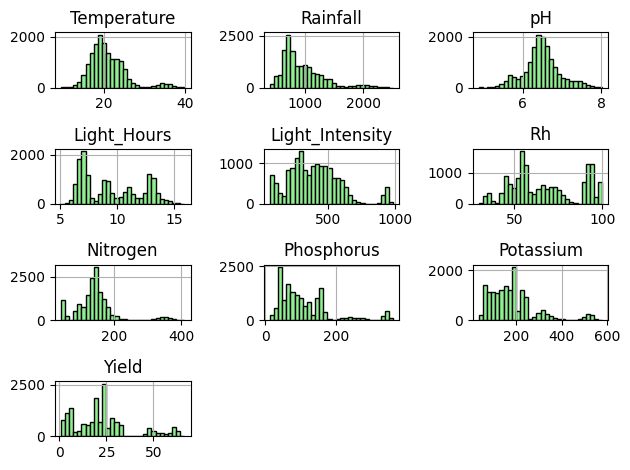

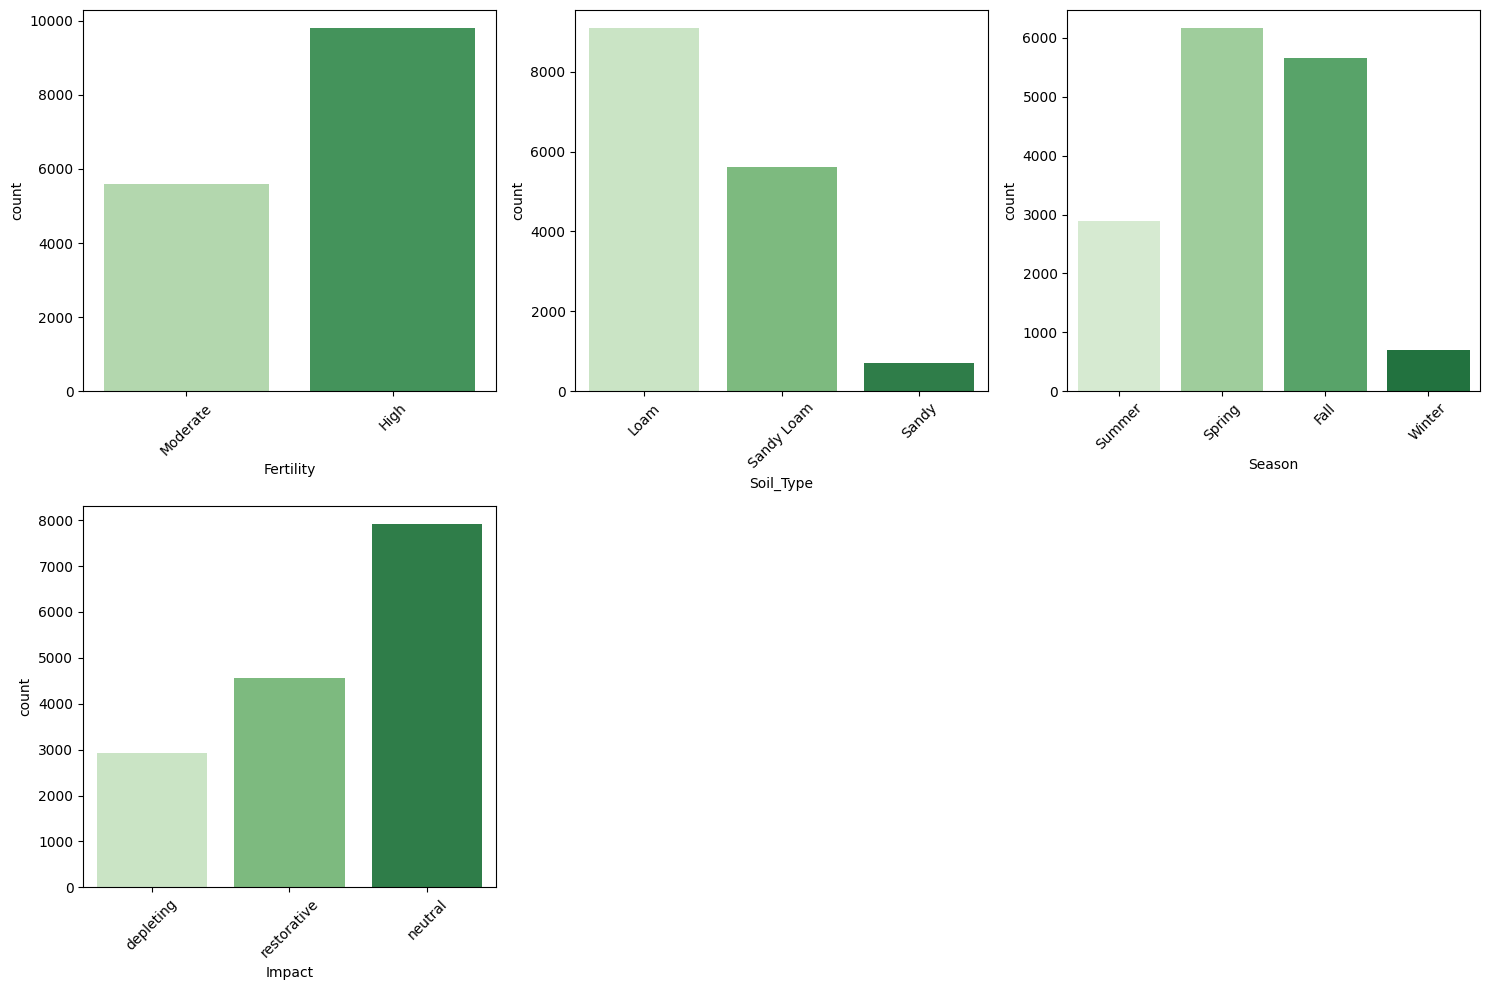

In [4]:
# missing values
print("\nMissing values:\n", df.isnull().sum())

# summary statistics for numerical features
print("\nSummary statistics:\n", df.describe())

# distribution of numerical features
plt.figure(figsize=(15, 10))
df.hist(bins=30, color='lightgreen', edgecolor='black')
plt.tight_layout()
plt.show()

# count plots for categorical features
categorical_columns = ['Fertility', 'Soil_Type', 'Season', 'Impact']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='Greens')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Filter dataset

In [ ]:
# on sandy soil it only grows Green Peas
sandy_soil_crops = df[df['Soil_Type'] == 'Sandy']['Name'].unique()
# array(['Green Peas']

# winter crops are: Kale, Cauliflowers and Broccoli
winter_crops = df[df['Season'] == 'Winter']['Name'].unique()
# array(['Kale', 'Cauliflowers', 'Broccoli']

### Data Preprocessing

In [5]:
# Data preprocessing
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

# encode the target variable (crop)
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df['Name'])

# var for training
X = df.drop(columns=['Name'])

# Standardize numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Correlation Analysis

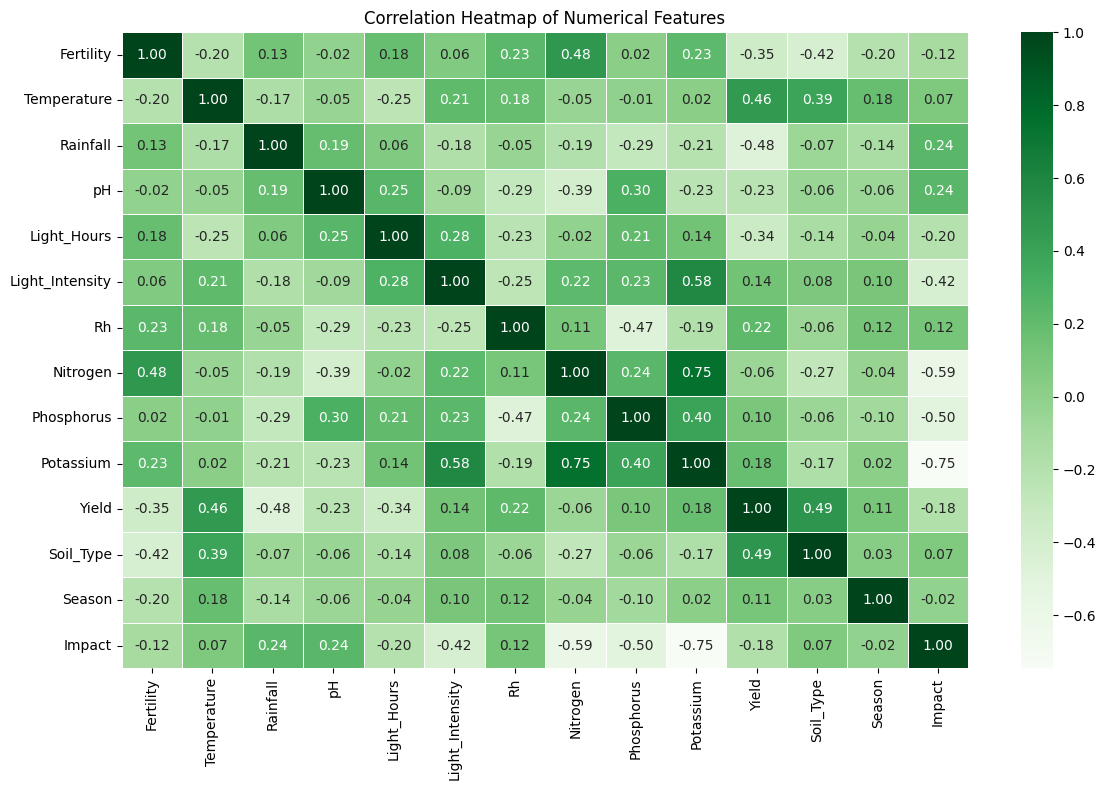

In [6]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Model Training and Evaluation

Model Performance:
Gradient Boosting: 0.9994
XGBoost: 1.0000
Random Forest: 1.0000
Logistic Regression: 0.9997


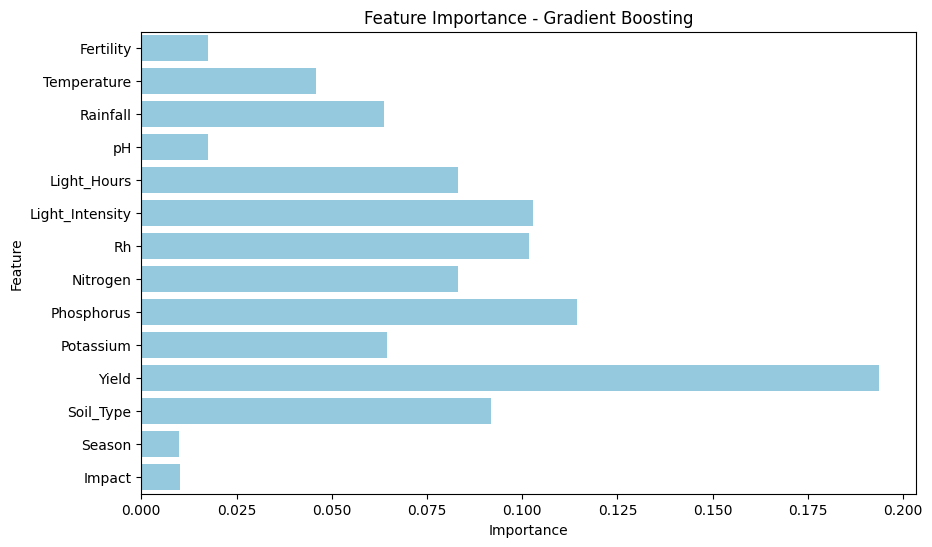

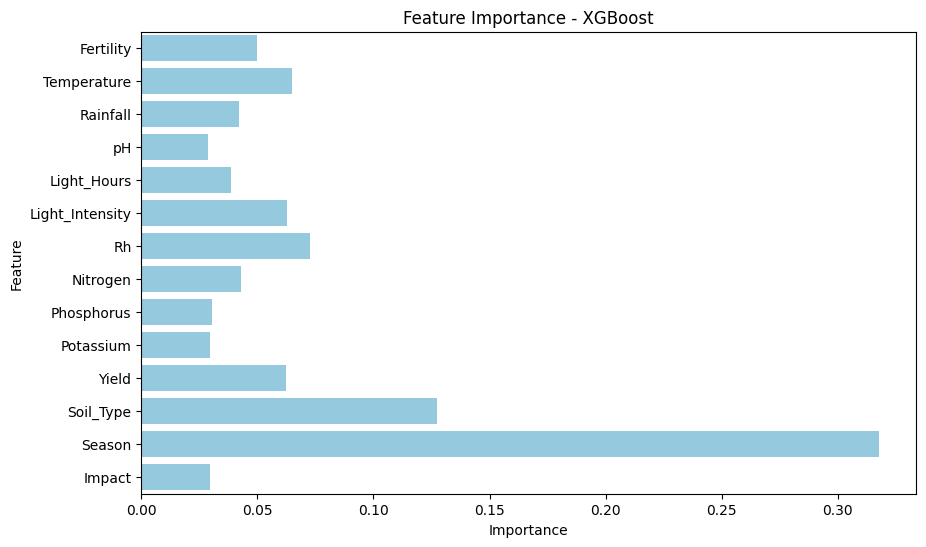

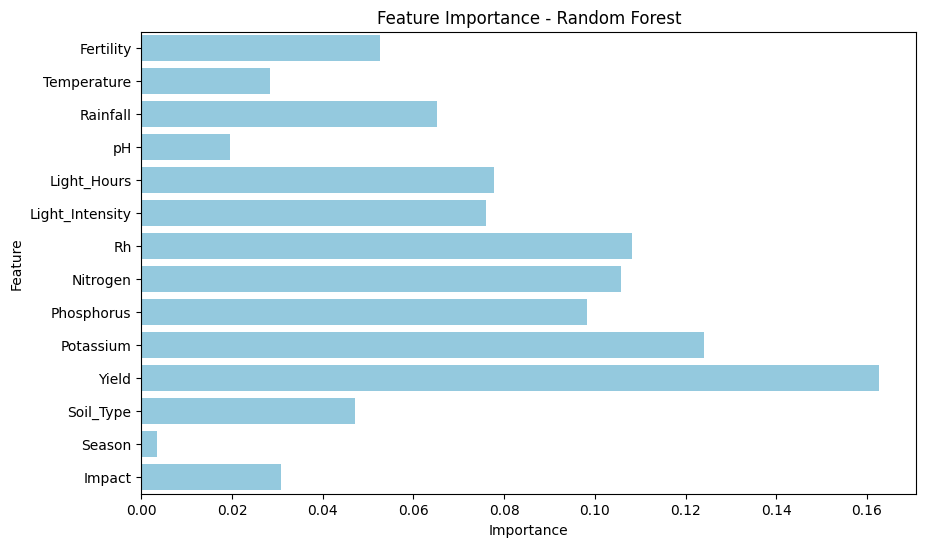

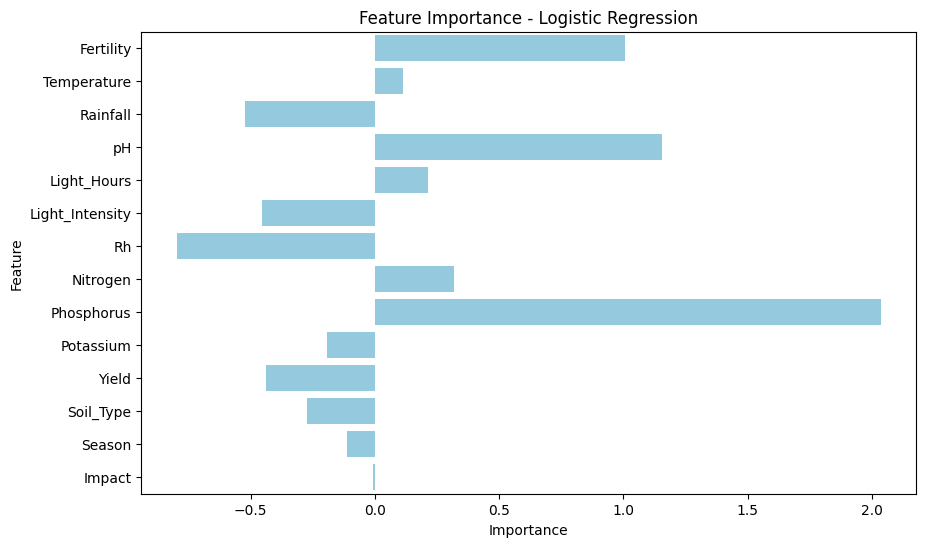

In [7]:
# define 4 models and accuracy
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

# train and evaluate models
model_results = {}
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = model.score(X_test, y_test)

    # feature importance for tree-based models
    if name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        feature_importances[name] = model.feature_importances_
    elif name == 'Logistic Regression':
        feature_importances[name] = model.coef_[0]  # Use coefficients for Logistic Regression

# Print model performance
print("Model Performance:")
for model_name, accuracy in model_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# feature importance- plots
for model_name, importance in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=X.columns, color='skyblue')
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


In [8]:
# Crop recommendation FINAL!!!!!!

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib  
 
file_path = 'soil.impact.csv'
soil_data = pd.read_csv(file_path)

# One-Hot Encoding to the 'Season' column ('Season_Spring', 'Season_Summer', etc.)
soil_data_encoded = pd.get_dummies(soil_data, columns=['Season'])

#data for Random Forest Classifier
X = soil_data_encoded[['Temperature', 'Rainfall', 'Light_Intensity', 'Nitrogen', 'Phosphorus', 'Potassium'] + list(soil_data_encoded.filter(like='Season_').columns)]
y = soil_data_encoded['Name']

# encode the target labels (crop names)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# train with Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# save the trained RandomForest model and LabelEncoder
#joblib.dump(rf_classifier, 'random_forest.pkl')
#joblib.dump(label_encoder, 'label_encoder.pkl')



RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf_classifier.predict(X_test)

# accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on the test set: {accuracy:.4f}")

Model accuracy on the test set: 0.9912


In [ ]:
# Function to predict the top 3 suitable crops based on input features
def predict_top_crops(input_features, model, label_encoder, top_n=3):
    # probabilities for each class (crop)
    probabilities = model.predict_proba([input_features])[0]
    
    # top_n crops based on probabilities
    top_indices = np.argsort(probabilities)[-top_n:][::-1]
    
    # decode the labels back to crop names
    top_crops = label_encoder.inverse_transform(top_indices)
    
    return top_crops

In [14]:
# input for testing
example_input = [20.0, 750.0, 180.0, 180.0, 120.0, 240.0, 0, 0, 1, 0]  # Autum is active (1), others (Summer, Spring, Winter) are 0

# Predict the top 3 crops using the trained model
top_crops = predict_top_crops(example_input, rf_classifier, label_encoder)

# Print the top 3 crops
print(f"Top 3 crops for actual conditions: {top_crops[0]}, {top_crops[1]}, and {top_crops[2]}.")


Top 3 crops for actual conditions: Strawberry, Potatoes, and Cabbage.


 # Crop rotation with Genetic Algorithms 

### Feature engineering

In [ ]:
# first step for crop rotation- calculate NPK means and categorize into 3 types: restorative,neutral, depleting-- creating a new column: Impact to work with 

# Calculate mean NPK values
mean_nitrogen = soil_data['Nitrogen'].mean()
mean_phosphorus = soil_data['Phosphorus'].mean()
mean_potassium = soil_data['Potassium'].mean()

#classify each crop based on NPK values
def classify_impact(row):
    conditions = [
        (row['Nitrogen'] < mean_nitrogen) and (row['Phosphorus'] < mean_phosphorus) and (row['Potassium'] < mean_potassium),
        (row['Nitrogen'] > mean_nitrogen) and (row['Phosphorus'] > mean_phosphorus) and (row['Potassium'] > mean_potassium)
    ]
    choices = ['restorative', 'depleting']
    return np.select(conditions, choices, default='neutral')

# create the new column
#soil_data['Impact'] = soil_data.apply(classify_impact, axis=1)


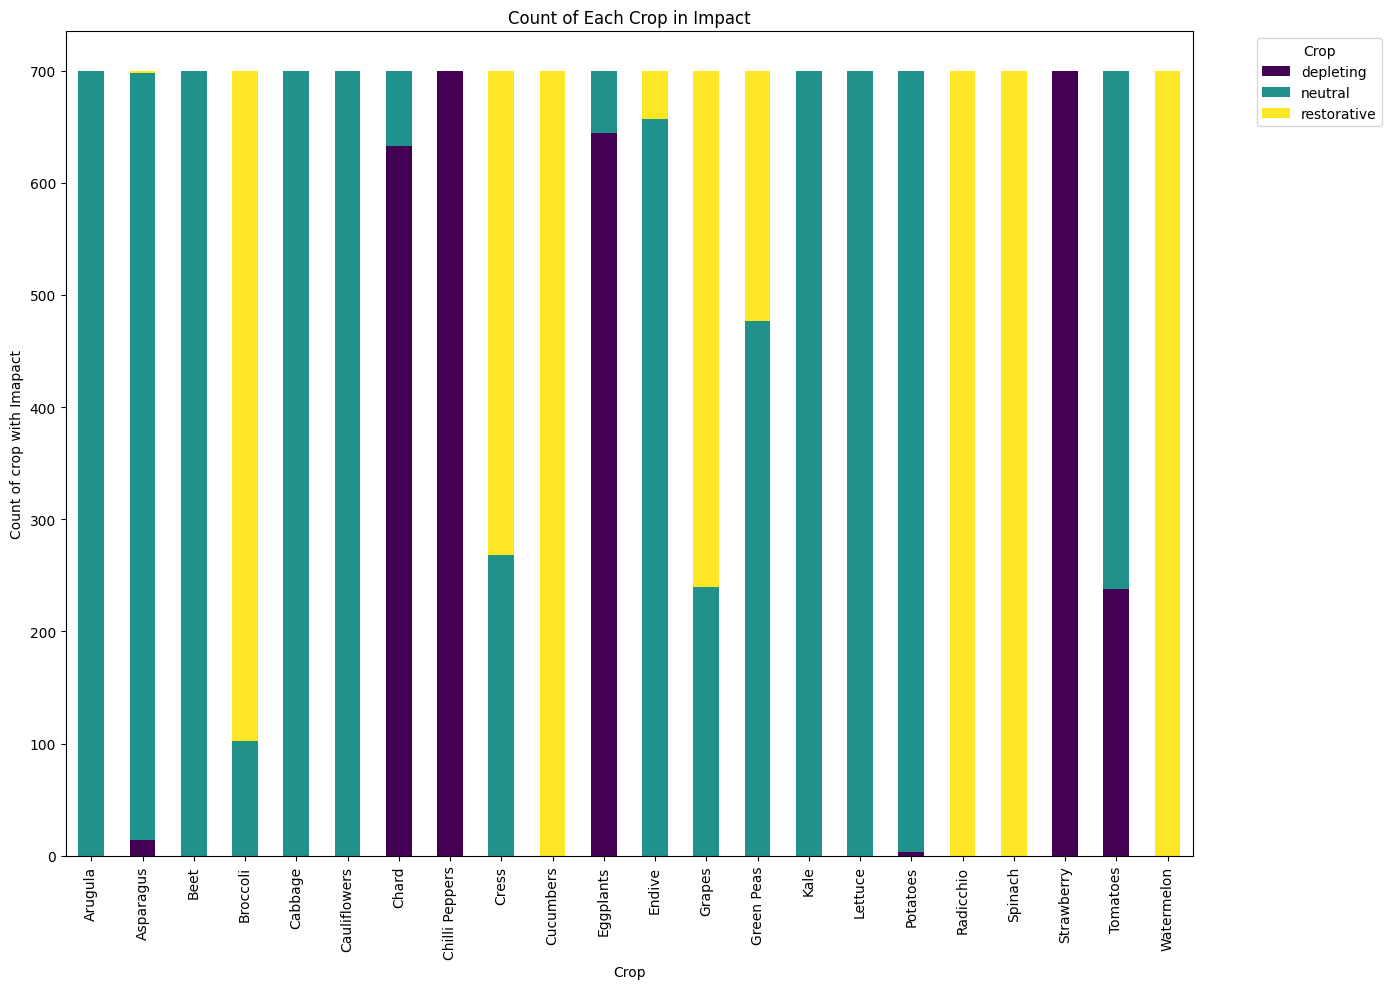

In [29]:
# different impact for different values 
impact_crops_counts = soil_data.pivot_table(index='Name', columns='Impact', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
impact_crops_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
plt.xlabel('Crop')
plt.ylabel('Count of crop with Imapact')
plt.title('Count of Each Crop in Impact')
plt.xticks(rotation=90)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# crop rotation FINAL!!!
import random
from deap import base, creator, tools, algorithms
import pandas as pd

# dataset
file_path = 'soil.impact.csv'
data = pd.read_csv(file_path)


impact_scores = {'restorative': 1, 'neutral': 0, 'depleting': -1}
data['Impact_Score'] = data['Impact'].map(impact_scores)

crops = data['Name'].unique()  
impact_data = data[['Name', 'Impact']].drop_duplicates() 

# genetic algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize fitness (yield, impact)
creator.create("Individual", list, fitness=creator.FitnessMax)

# create individual (crop rotation plan for 3 years with 3 crops per year = 9 results)
def create_individual():
    return [random.choice(impact_data.values.tolist()) for _ in range(9)]  

# Fitness function for evaluating each crop rotation plan
def evaluate(individual):
    unique_crops = len(set(crop for crop, _ in individual))  # reward for crop diversity
    random_yield = sum(random.uniform(10, 30) for _ in individual)  # random yield because actual yield doesn't give good results
    
    # evaluation based on impact categories
    impact_score = 0
    for _, impact in individual:
        if impact == "restorative":
            impact_score += 1  # 1 point for restorative crops
        elif impact == "neutral":
            impact_score += 0  # neutral crops get 0 points
        elif impact == "depleting":
            impact_score -= 1  # penalize depleting crops -1

    return unique_crops + random_yield + impact_score,  # Total fitness value

# GA components
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register genetic operators
toolbox.register("mate", tools.cxTwoPoint)  # two-point crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)  # shuffle mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # tournament selection
toolbox.register("evaluate", evaluate)

# Genetic Algorithm parameters
population_size = 8000  # population size
generations = 30  #  generations
mutation_prob = 0.1 # probability of mutation
crossover_prob = 0.5 # probability of crossover

# Generate the initial population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
result_population, log = algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=generations, verbose=False)

# Get the best individual (crop rotation plan)
best_individual = tools.selBest(result_population, 1)[0]
result= pd.DataFrame(best_individual)
print("Best Crop Rotation Plan: ", result)


Best Crop Rotation Plan:                0            1
0        Grapes  restorative
1     Cucumbers  restorative
2  Cauliflowers      neutral
3       Spinach  restorative
4       Cabbage      neutral
5    Strawberry    depleting
6    Watermelon  restorative
7    Watermelon  restorative
8      Broccoli  restorative
